# Unsupervised classification of wine

This is an unsupervised analysis exercise on the "Wine" dataset from SKlearn [1,2]. The data is the results of a chemical analysis of 178 wines grown in the same region in Italy by three different cultivators. There are 13 different measurements taken for different constituents found in the wine, listed below.

### Features:
The data features / input variables (X) are:
* alcohol
* malic_acid
* ash
* alcalinity_of_ash
* magnesium
* total_phenols
* flavanoids
* nonflavanoid_phenols
* proanthocyanins
* color_intensity
* hue
* od280/od315_of_diluted_wines
* proline

Note, that there is a target value (target = cultivator [0, 1, 2]) in the data, but that this is only for checking how well your dimensionality reduction / clustering works.


### Task:
Thus, the task before you is to:<br>
1) Make three queries, which produces three files of data containing stars, galaxies, and quasars.<br>
2) Combine the three data files into one, which has a target value corresponding to the file type.<br>
3) Read and inspect this data, and make sure that you understand what it (roughly) looks like.<br>
4) Clean/cut (or impute) the data, such that different (unsupervised) analysis techniques will work.<br>
5) Run a (k)PCA (and later other techniques) on it, and see what the resulting distributions looks like.<br>

Do you in the end manage to get e.g. get three well separated classes out?<br>

***

[1] Original Owners: Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

[2] Citation: Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

***

* Author: Troels C. Petersen (NBI)
* Email:  petersen@nbi.dk
* Date:   27th of April 2023

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
# Search for missing, NA and null values)


(data.isnull() | data.empty | data.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [4]:
#Let's see the frequency of the variable target.
#Convert variable to categorical.
data.target=data.target.astype('int64').astype('category')

#Frequency.
freq=data['target'].value_counts()

freq

target
1    71
0    59
2    48
Name: count, dtype: int64

<Axes: xlabel='target'>

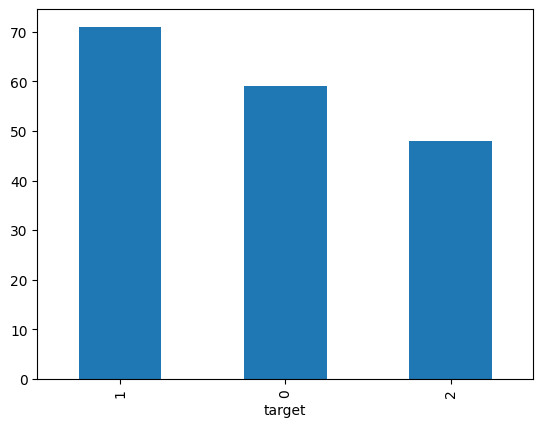

In [5]:
#Let's check graphically.
freq.plot(kind='bar')

In [6]:
#Let's show a summary of teh dataset where we can see 
# the basic statistic data.
data.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium   
count  178.000000  178.000000  178.000000         178.000000  178.000000  \
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins   
count     178.000000  178.000000            178.000000       178.000000  \
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

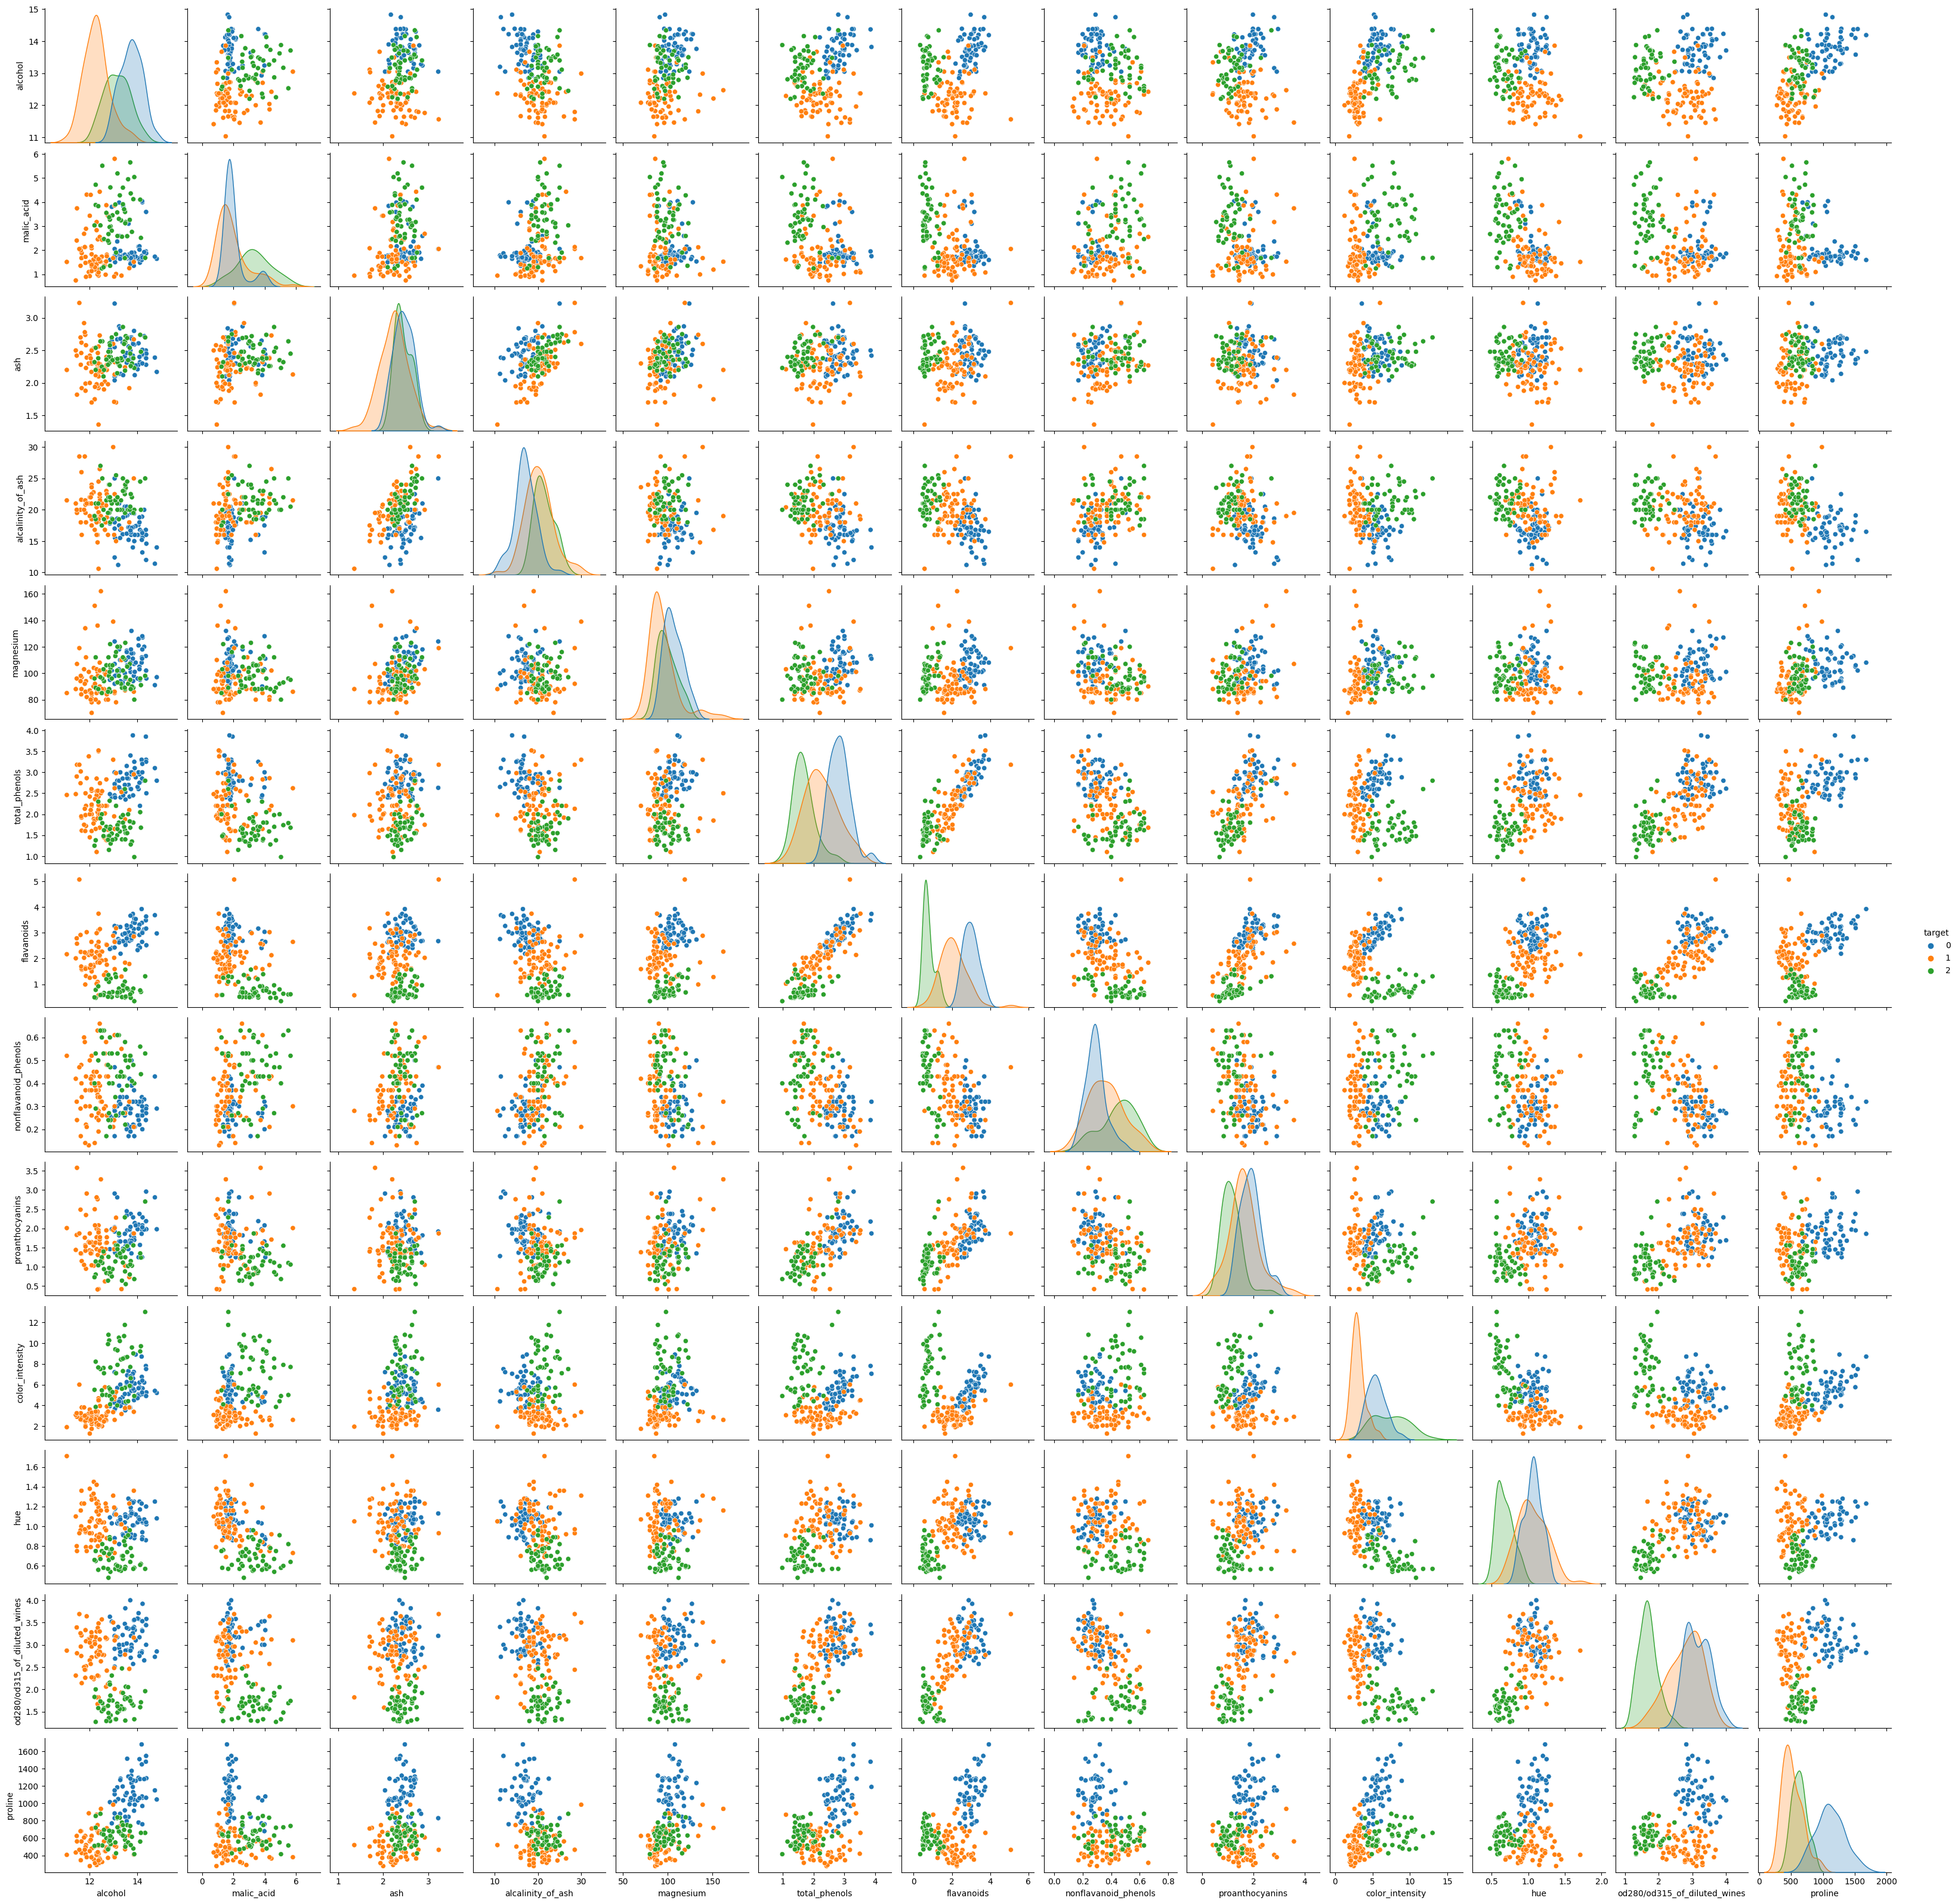

In [7]:
#scatter plots
sns.pairplot(data,hue='target')

In [8]:
from sklearn.preprocessing import quantile_transform
data_X = data.drop(['target'], axis=1) #We are not going to use the target for unsupervised learning
X = quantile_transform(data_X, copy=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [ ]:
df_X = pd.DataFrame(data = X_new
             , columns = ['PC 1', 'PC 2'])
df_y = pd.DataFrame(data = freq, columns = ['target'])

finalDf = pd.concat([df_X, data['target']], axis = 1)
finalDf.head()

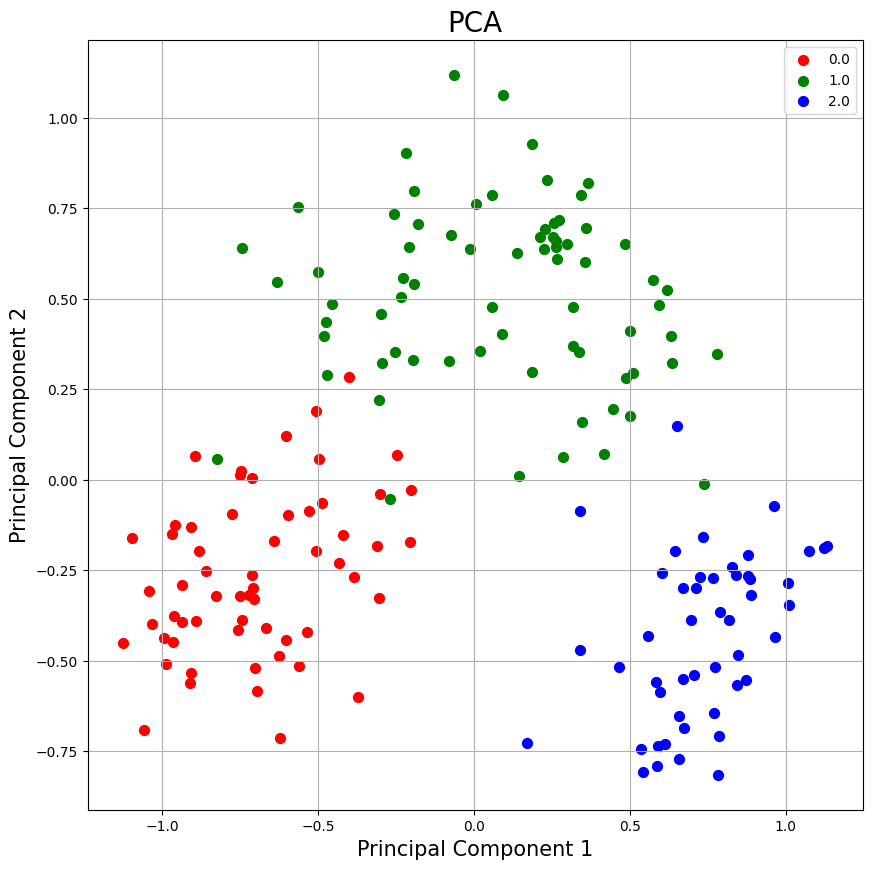

In [11]:
# Show the graphics.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## K-Means clustering

In [12]:
from sklearn.cluster import KMeans

# k-means with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', 
                n_init=5, random_state=42)
y_pred = kmeans.fit_predict(X_new)

In [13]:
df_X_kmeans = pd.DataFrame(data = X_new
             , columns = ['PC 1', 'PC 2'])
df_y_kmeans = pd.DataFrame(data = y_pred, columns = ['target'])

finalDf_kmeans = pd.concat([df_X_kmeans, df_y_kmeans], axis = 1)
finalDf_kmeans.head()

PC 1      PC 2  target
0 -1.032208 -0.397948       1
1 -0.602119  0.120060       1
2 -0.704176 -0.329788       1
3 -1.058673 -0.692075       1
4 -0.305006 -0.325799       1

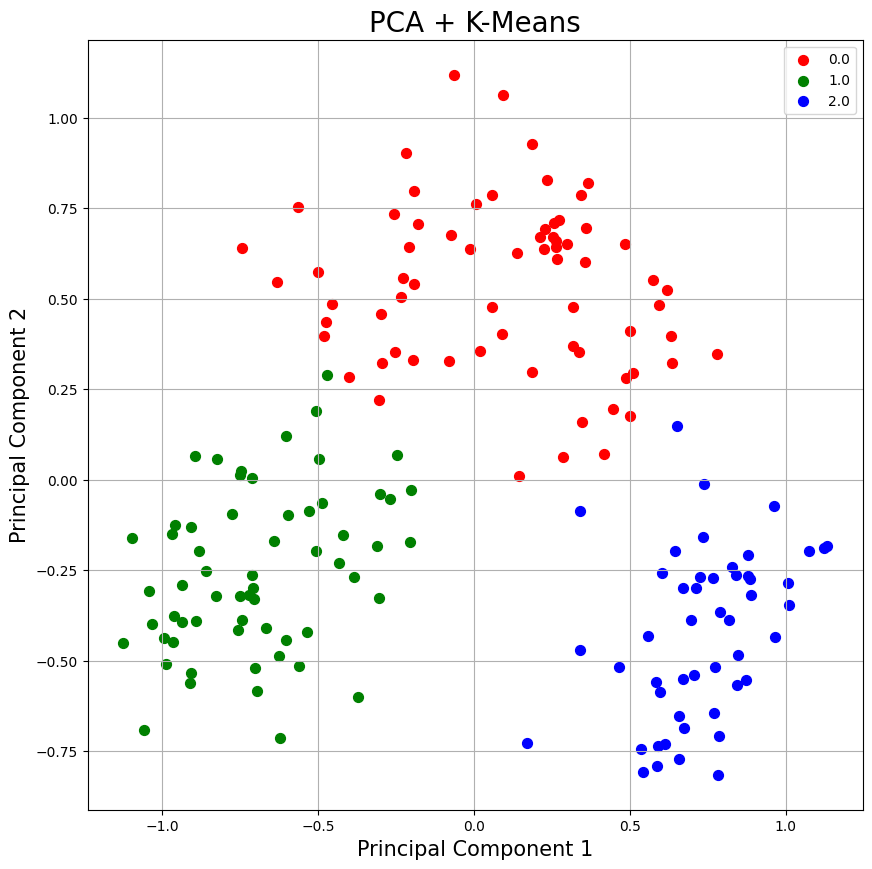

In [14]:
# Show the graphics.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA + K-Means', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_kmeans['target'] == target
    ax.scatter(finalDf_kmeans.loc[indicesToKeep, 'PC 1']
               , finalDf_kmeans.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## DBSCAN 

The model outputan integer value: '-1' for outliers and the rest for clusters.

In [15]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.14, min_samples=3).fit(X_new)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 15


In [16]:
df_X_dbscan = pd.DataFrame(data = X_new
             , columns = ['PC 1', 'PC 2'])
df_y_dbscan = pd.DataFrame(data = labels, columns = ['target'])

finalDf_dbscan = pd.concat([df_X_dbscan, df_y_dbscan], axis = 1)
finalDf_dbscan.head()

PC 1      PC 2  target
0 -1.032208 -0.397948       0
1 -0.602119  0.120060       0
2 -0.704176 -0.329788       0
3 -1.058673 -0.692075      -1
4 -0.305006 -0.325799       0

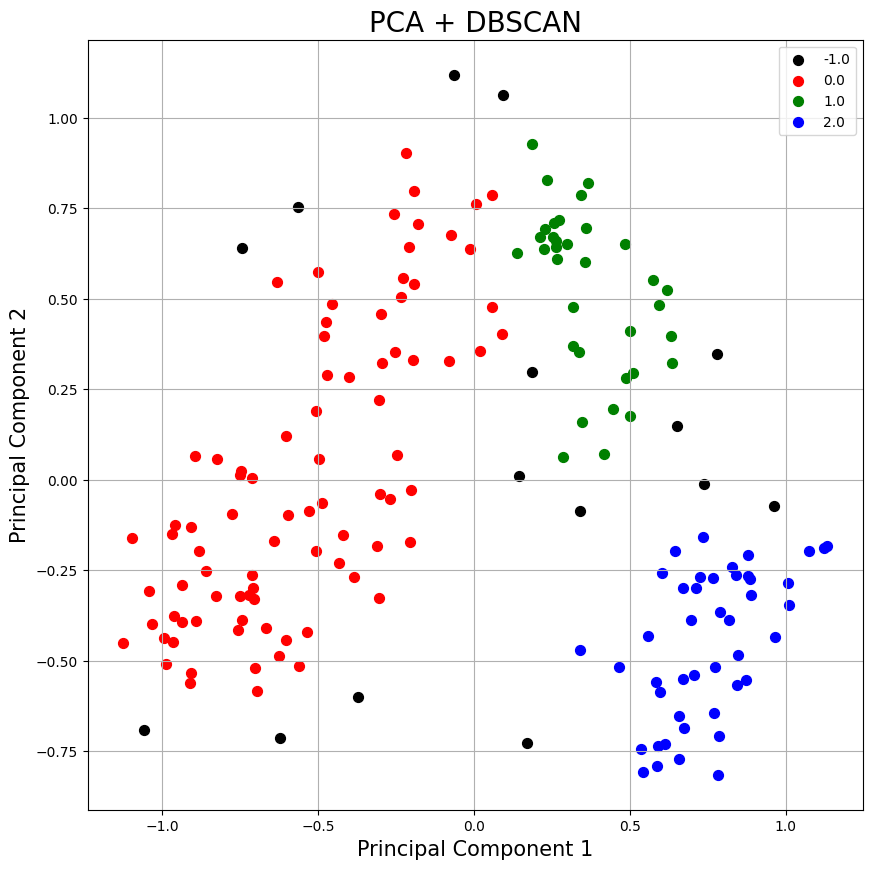

In [17]:
# Show the graphics.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA + DBSCAN', fontsize = 20)
targets = [-1.0, 0.0, 1.0, 2.0]
colors = ['#000000','r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_dbscan['target'] == target
    ax.scatter(finalDf_dbscan.loc[indicesToKeep, 'PC 1']
               , finalDf_dbscan.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()